Degree | Train MSE | Test MSE | Train R2 | Test R2
  1    | 319.3898 | 243.1070 | 0.8352 | 0.8101
  2    | 143.1810 | 144.0827 | 0.9261 | 0.8874
  3    | 142.5818 | 149.5640 | 0.9264 | 0.8831
  4    | 135.5799 | 174.9067 | 0.9301 | 0.8633
  5    | 130.8142 | 173.1327 | 0.9325 | 0.8647
  6    | 127.9706 | 167.7674 | 0.9340 | 0.8689
  7    | 127.7704 | 168.0349 | 0.9341 | 0.8687
Best polynomial degree: 2


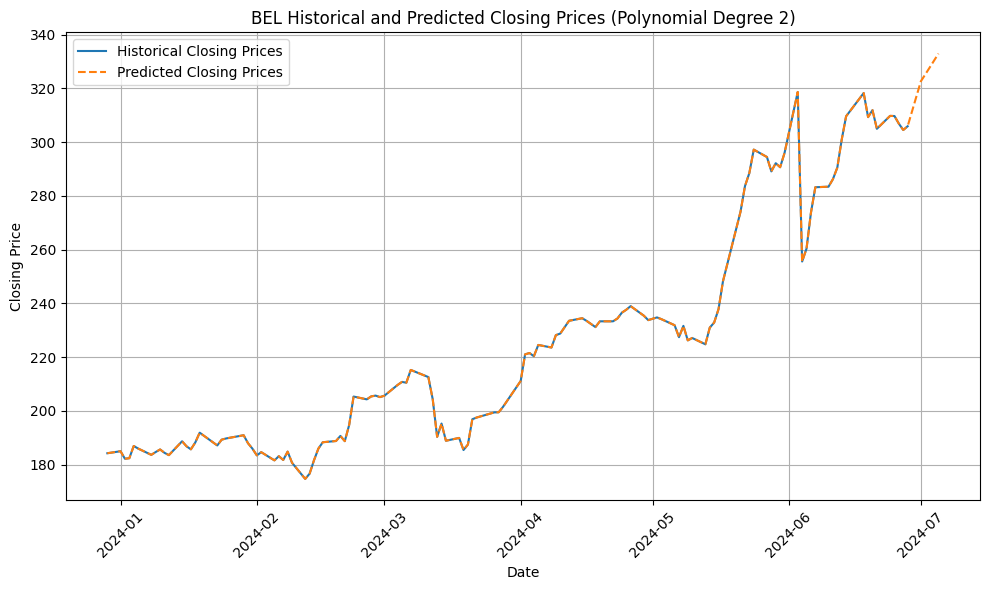

Degree | Train MSE | Test MSE | Train R2 | Test R2
  1    | 109934.9889 | 82430.1851 | 0.8475 | 0.8358
  2    | 41548.5021 | 25193.2484 | 0.9424 | 0.9498
  3    | 40184.1889 | 28075.3882 | 0.9443 | 0.9441
  4    | 33305.4180 | 33247.9250 | 0.9538 | 0.9338
  5    | 32931.7949 | 34694.8489 | 0.9543 | 0.9309
  6    | 32891.4073 | 34543.4017 | 0.9544 | 0.9312
  7    | 31711.8514 | 34603.0672 | 0.9560 | 0.9311
Best polynomial degree: 2


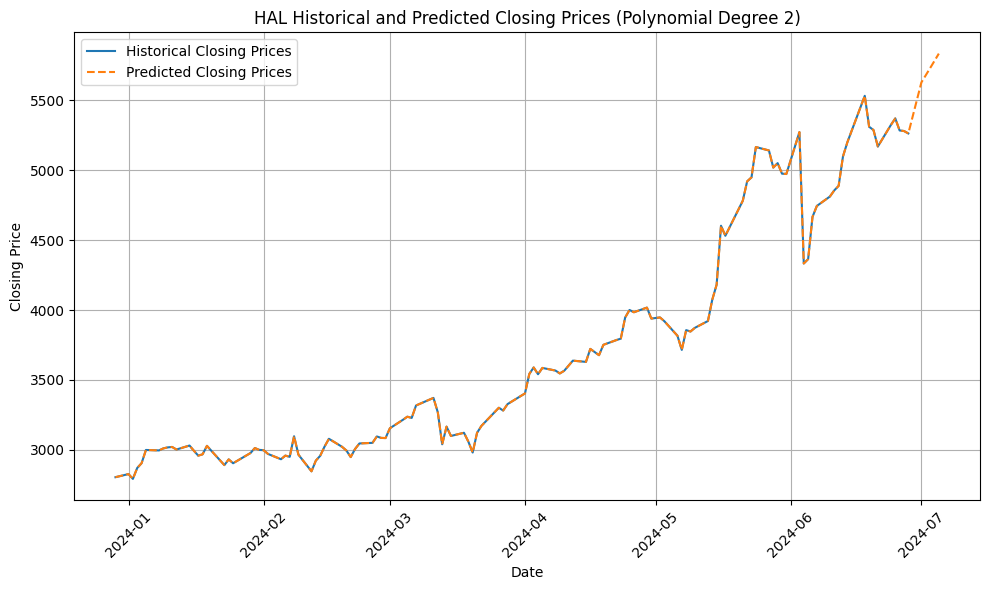

Degree | Train MSE | Test MSE | Train R2 | Test R2
  1    | 133.1379 | 152.7772 | 0.2093 | -0.0294
  2    | 41.7200 | 43.8283 | 0.7522 | 0.7047
  3    | 41.4336 | 44.5310 | 0.7539 | 0.7000
  4    | 37.2438 | 38.7715 | 0.7788 | 0.7388
  5    | 37.2061 | 39.3464 | 0.7790 | 0.7349
  6    | 37.0171 | 40.9274 | 0.7802 | 0.7242
  7    | 32.8749 | 55.0677 | 0.8048 | 0.6290
Best polynomial degree: 4


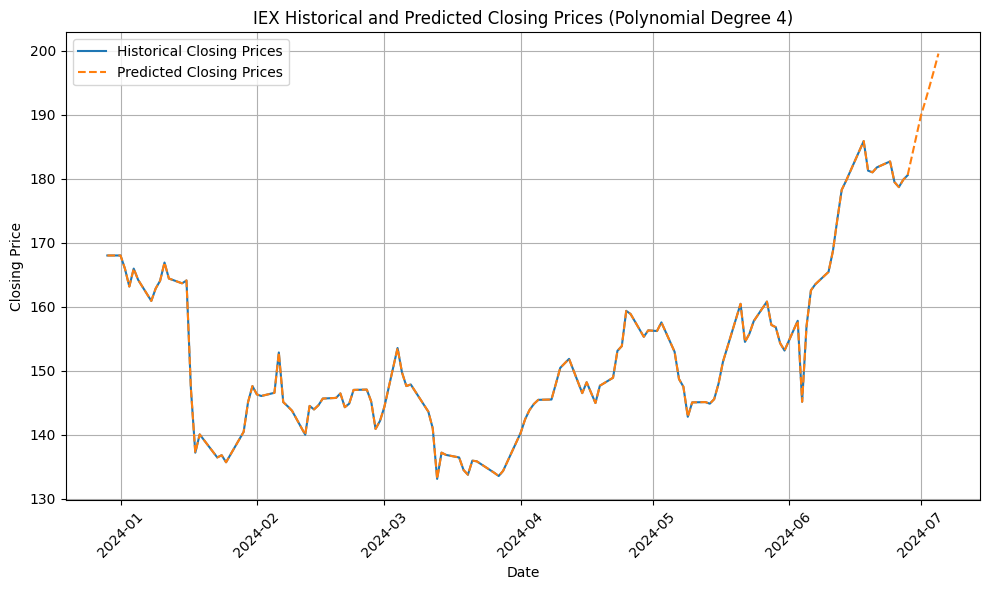

Degree | Train MSE | Test MSE | Train R2 | Test R2
  1    | 95968.7025 | 112007.5675 | 0.7497 | 0.6255
  2    | 79445.3230 | 95483.1692 | 0.7928 | 0.6808
  3    | 62821.1505 | 76221.2571 | 0.8361 | 0.7452
  4    | 50853.3013 | 54001.7898 | 0.8674 | 0.8195
  5    | 50471.3199 | 52988.8094 | 0.8683 | 0.8228
  6    | 50471.3154 | 52979.2310 | 0.8683 | 0.8229
  7    | 50086.8520 | 55096.2563 | 0.8694 | 0.8158
Best polynomial degree: 6


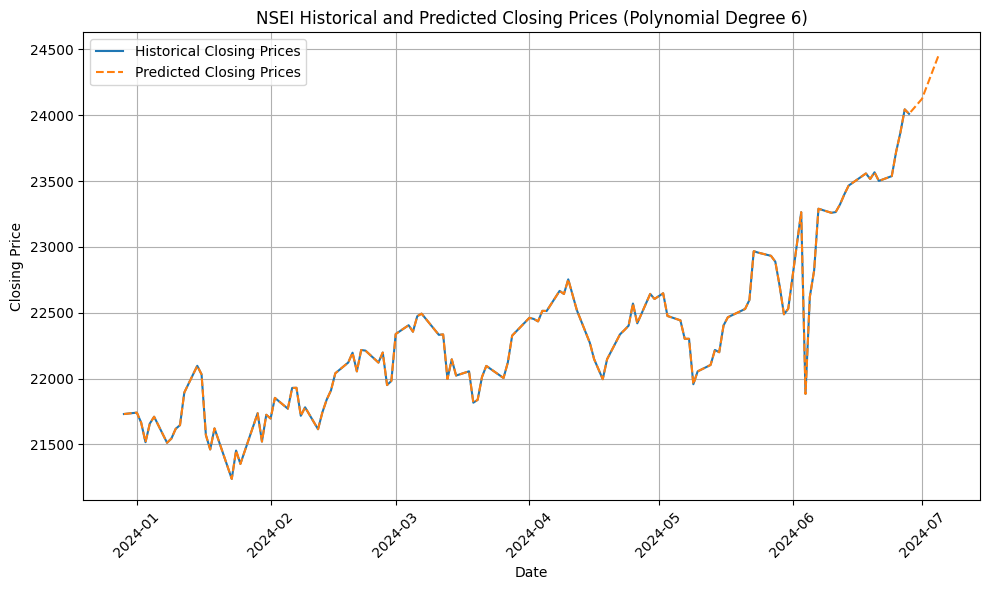

Degree | Train MSE | Test MSE | Train R2 | Test R2
  1    | 351.0538 | 253.3262 | 0.0007 | -0.0348
  2    | 113.7096 | 103.6778 | 0.6763 | 0.5765
  3    | 98.6824 | 72.2306 | 0.7191 | 0.7050
  4    | 92.8913 | 66.7208 | 0.7356 | 0.7275
  5    | 68.1680 | 42.9961 | 0.8060 | 0.8244
  6    | 68.1504 | 42.5927 | 0.8060 | 0.8260
  7    | 47.7188 | 56.2889 | 0.8642 | 0.7701
Best polynomial degree: 6


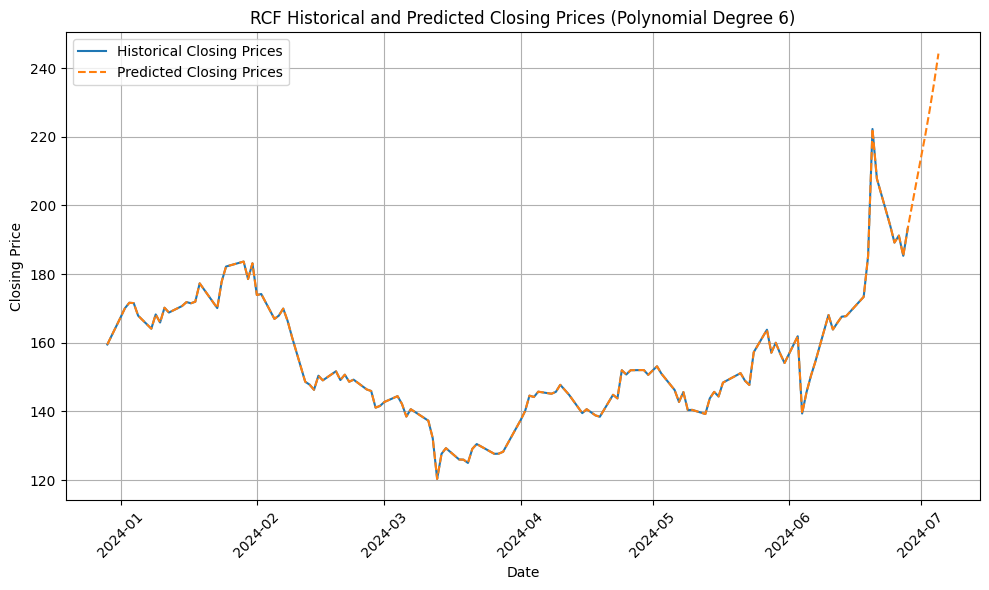

Degree | Train MSE | Test MSE | Train R2 | Test R2
  1    | 838.2073 | 1112.0288 | 0.8536 | 0.7559
  2    | 673.7079 | 912.3925 | 0.8823 | 0.7997
  3    | 671.9631 | 895.3018 | 0.8826 | 0.8035
  4    | 668.9274 | 872.8647 | 0.8832 | 0.8084
  5    | 543.5297 | 587.6719 | 0.9051 | 0.8710
  6    | 388.5207 | 546.7846 | 0.9321 | 0.8800
  7    | 385.2729 | 487.9806 | 0.9327 | 0.8929
Best polynomial degree: 7


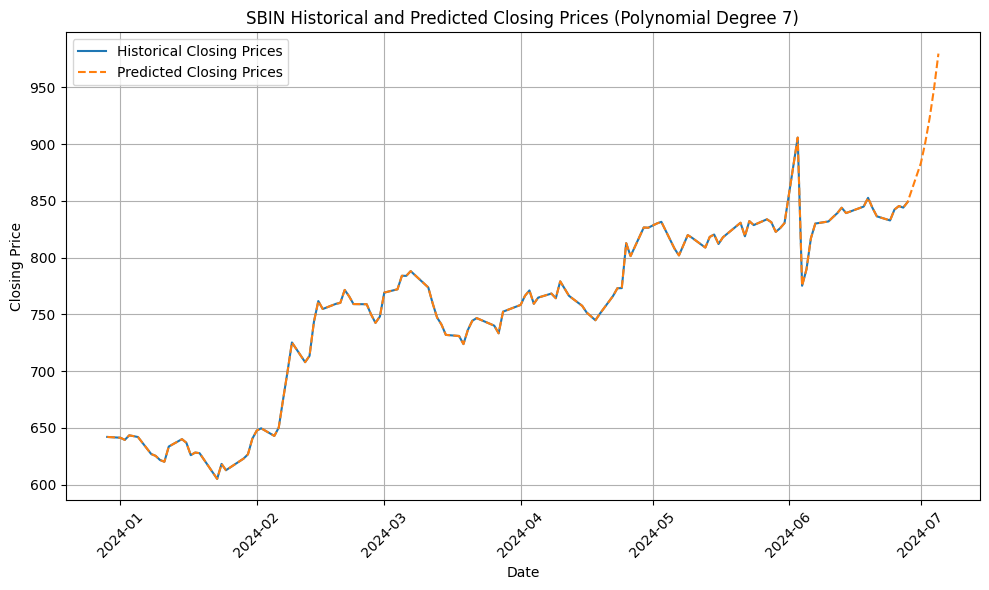

In [6]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import uuid

# Function to check and convert values to float
def convert_to_float(value):
    try:
        if isinstance(value, str):
            return float(value.replace(',', ''))
        else:
            return float(value)
    except ValueError:
        # Handle any non-numeric values gracefully
        return np.nan

# Regular expression to remove the timezone name in parentheses
def remove_timezone_name(date_str):
    return re.sub(r'\s*\(.*\)$', '', date_str)


folder_path = f'C:/Raghav Proj/StockFinder/ZirodhaCsvFiles'    

def genarate_png(file_path):
    pattern = r'\\([A-Z]+)\.NS\.csv'
    script = re.search(pattern, file_path).group(1)

    uid = uuid.uuid4()
    output_file_path = f'C:\\Raghav Proj\\StockFinder\\Output\\{script}_{uid}.png'    

    # Load data from Excel file
    #file_path = f'C:\\Raghav Proj\\StockFinder\\{fileName}.csv'  # Update with the actual path to your Excel file
    df = pd.read_csv(file_path)

    # # Load data from CSV file
    # file_path = '/mnt/data/stock_data.csv'  # Update with the actual path to your CSV file
    # df = pd.read_csv(file_path)

    # Apply the regex function to the 'Date' column
    df['Date'] = df['Date'].apply(remove_timezone_name)

    # Define the correct date format for hourly data
    date_format = "%a %b %d %Y %H:%M:%S GMT%z"
    
    # Ensure the Date column is in datetime format
    # Convert 'Date' column to datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Apply the conversion function to the 'Close' column
    df['Close'] = df['Close'].apply(convert_to_float)

    # Sort data by date
    df = df.sort_values(by='Date')

    # Preprocess the 'Close' column
    #df['close '] = df['close '].str.replace(',', '').astype(float)

    # Extract the 'Date' and 'Close' columns
    dates = df['Date']
    closing_prices = df['Close']

    # Prepare the data for the regression model
    X = np.array(range(len(dates))).reshape(-1, 1)
    y = closing_prices.values

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 

    # Evaluate polynomial regression models up to degree 5
    max_degree = 7
    results = evaluate_polynomial_regression(X_train, y_train, X_test, y_test, max_degree)

    # Print the results
    print("Degree | Train MSE | Test MSE | Train R2 | Test R2")
    for degree, train_mse, test_mse, train_r2, test_r2 in results:
        print(f"{degree:^6} | {train_mse:.4f} | {test_mse:.4f} | {train_r2:.4f} | {test_r2:.4f}")

    # Select the best degree based on the test MSE or R2
    best_degree = min(results, key=lambda x: x[2])[0]  # Select based on test MSE

    print(f"Best polynomial degree: {best_degree}")

    # Fit and predict with the best degree
    poly = PolynomialFeatures(degree=best_degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)

    # Predict future values
    future_days = 5
    X_future = np.array(range(len(dates), len(dates) + future_days)).reshape(-1, 1)
    X_future_poly = poly.transform(X_future)
    y_future = model.predict(X_future_poly)

    # Adding more closing prices (example)
    additional_dates = pd.date_range(dates.iloc[-1] + pd.Timedelta(days=1), periods=future_days, freq='B')
    additional_closing_prices = y_future  # For the sake of this example, use the predictions

    # Extend the original dates and closing prices with the new data
    extended_dates = pd.concat([dates, pd.Series(additional_dates)])
    extended_closing_prices = np.concatenate([y, additional_closing_prices])

    # Determine the range of closing prices for horizontal lines
    min_price = min(closing_prices.min(), additional_closing_prices.min())
    max_price = max(closing_prices.max(), additional_closing_prices.max())
    horizontal_lines = np.arange(start=np.floor(min_price / 5) * 5, stop=np.ceil(max_price / 5) * 5, step=5)
    # Extend dates for plotting future values
    #extended_dates = pd.date_range(dates.iloc[0], periods=len(dates) + future_days, freq='B')

    # Plotting the data
    plt.figure(figsize=(10, 6))
    plt.plot(dates, closing_prices, label='Historical Closing Prices')
    plt.plot(extended_dates, np.concatenate([y, y_future]), label='Predicted Closing Prices', linestyle='--')

    # Define specific closing prices for horizontal lines (example)
    #horizontal_lines = [100, 120, 140, 160]

    # Add horizontal lines
    # for price in horizontal_lines:
    #     plt.plot(extended_dates, np.full_like(extended_dates, price), '-', color='gray', linewidth=0.7)

    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.title(script + f' Historical and Predicted Closing Prices (Polynomial Degree {best_degree})')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Save the plot as a PNG file
    plt.savefig(output_file_path, format='png')

    # Show the plot
    plt.show()

# Function to evaluate polynomial regression models with different degrees
def evaluate_polynomial_regression(X_train, y_train, X_test, y_test, max_degree):
    results = []
    for degree in range(1, max_degree + 1):
        # Transform features
        poly = PolynomialFeatures(degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        
        # Train model
        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        
        # Predict and evaluate
        y_train_pred = model.predict(X_train_poly)
        y_test_pred = model.predict(X_test_poly)
        
        # Calculate metrics
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        
        results.append((degree, train_mse, test_mse, train_r2, test_r2))
        
    return results

# Read all CSV files in the folder
dfs = []
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        genarate_png(file_path)